In [25]:
# System.
import datetime

# Data manipulation.
import pandas as pd
import numpy as np
import math

# Plotting.
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [26]:
# Matplotlib params.
mpl.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'grid.linestyle': '--',
    'grid.color': 'lightgray',
    'font.size': 12,
    'legend.frameon': False,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'xtick.direction': 'out',
    'ytick.direction': 'out'
})

CYAN = "#03adfc"      
FANTA = "#ff9800" 

In [27]:
# Load data.
p = '/Users/jakecordery/Desktop/dissertation-york/data/raw/covid_confirmed_usafacts.csv'
df = pd.read_csv(p)

In [28]:
df1 = df[df['County Name'] == 'Statewide Unallocated']
df.head(10)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,18872,18872,18872,18872,18872,18872,18872,18872,18872,18872
6,1011,Bullock County,AL,1,0,0,0,0,0,0,...,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057
7,1013,Butler County,AL,1,0,0,0,0,0,0,...,6617,6617,6617,6617,6617,6617,6617,6617,6617,6617
8,1015,Calhoun County,AL,1,0,0,0,0,0,0,...,41931,41931,41931,41931,41931,41931,41931,41931,41931,41931
9,1017,Chambers County,AL,1,0,0,0,0,0,0,...,10935,10935,10935,10935,10935,10935,10935,10935,10935,10935


In [29]:
# Load data.
p = '/Users/jakecordery/Desktop/dissertation-york/data/raw/covid_confirmed_usafacts.csv'
df = pd.read_csv(p)

# Drop incomplete data.
df = df[df['County Name'] != 'Statewide Unallocated']
df= df.drop('StateFIPS', axis=1).reset_index()

print(df.head(2))
print(len(df)) # 3142 counties.

   index  countyFIPS      County Name State  2020-01-22  2020-01-23  \
0      1        1001  Autauga County     AL           0           0   
1      2        1003  Baldwin County     AL           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2023-07-14  \
0           0           0           0           0  ...       19913   
1           0           0           0           0  ...       70521   

   2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  \
0       19913       19913       19913       19913       19913       19913   
1       70521       70521       70521       70521       70521       70521   

   2023-07-21  2023-07-22  2023-07-23  
0       19913       19913       19913  
1       70521       70521       70521  

[2 rows x 1269 columns]
3142


In [30]:
print(f"Columns in the dataframe: {list(df.columns)}")

Columns in the dataframe: ['index', 'countyFIPS', 'County Name', 'State', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2

In [31]:
class DfInfo:
    def __init__(self, df):
        self.df = df
        self.ID_COLS = ['countyFIPS', 'County Name', 'State'] # Save these to add back in after splitting and scaling.
        self.NUMERIC_COLS = [col for col in self.df.columns if col not in self.ID_COLS]
        self.NUMERIC_COLS = sorted(self.NUMERIC_COLS, key=lambda x: pd.to_datetime(x, errors='coerce'))

        # Remove the first and last 6th of the dates because they are mostly just 0s (no daily change).
        # States either didn't report cases daily or stopped entirely.
        num_dates = len(self.NUMERIC_COLS)
        new_start = num_dates // 6
        new_end = num_dates - new_start

        self.NUMERIC_COLS = self.NUMERIC_COLS[new_start:new_end]

In [32]:
# Remove unwanted dates from dataframe.
dfinfo = DfInfo(df=df)
cols = dfinfo.ID_COLS + dfinfo.NUMERIC_COLS 
df = df[cols]

In [33]:
# Split the dataset into train, validation and test.
def split_df(df):
    # Drop nan rows in the non_date_cols.
    df = df.dropna(axis=0, subset=dfinfo.ID_COLS)

    date_cols = [col for col in df.columns if col not in dfinfo.ID_COLS]
    date_cols_sorted = sorted(date_cols, key=lambda x: pd.to_datetime(x, errors='coerce'))

    # 75:10:15 train:test split.
    total_cols = len(date_cols_sorted)
    i1, i2 = int(total_cols * 0.75), int(total_cols * 0.85)
    trcols, valcols, tscols = dfinfo.ID_COLS + date_cols_sorted[:i1], dfinfo.ID_COLS + date_cols_sorted[i1:i2], dfinfo.ID_COLS + date_cols_sorted[i2:]
    dftrain, dfval, dftest = df[trcols], df[valcols], df[tscols]
    return dftrain, dfval, dftest

dftrain, dfval, dftest = split_df(df)

In [34]:
def display_mean_dist(ax, df, title):
    df_plot = df.drop(dfinfo.ID_COLS, axis=1)
    meandf = df_plot.mean(axis=0)
    data = meandf.to_numpy()
    
    ax.plot(np.arange(0, data.shape[0], 1), data, color=CYAN, linewidth=0.5)
    ax.set_xlabel('Date')
    ax.set_ylabel('Case Number')
    ax.set_title(title)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(direction='out', length=6, width=1, colors='gray')
    return ax

In [35]:
def make_daily(df):
    # Extract cumulative counts as a numpy array.
    cumulative_counts = df[dfinfo.NUMERIC_COLS].values

    # Compute daily differences along each row (county).
    daily_diff = np.diff(cumulative_counts, axis=1)  # One fewer column than cumulative.
    daily_cases = daily_diff.copy()
    daily_cases[daily_cases < 0] = 0  # Ensure no negative daily cases from error.
    dfinfo.NUMERIC_COLS = dfinfo.NUMERIC_COLS[1:]

    # Create county-level daily dataframe.
    df_daily = df[dfinfo.ID_COLS].copy()
    df_daily = pd.concat([df_daily, pd.DataFrame(daily_cases, columns=dfinfo.NUMERIC_COLS)], axis=1)
    return df_daily

In [36]:
def apply_rolling_av(df):
    # Row-wise operation, replace the current day's data with the [current:current+7] day's average of data.
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].T.rolling(window=7, min_periods=1).mean().T
    return df

In [37]:
def interpolate_df(df):
    # Transpose, interpolate (so that each date column is filled column-wise), then transpose back.
    # Interpolate missing values along the date axis for each county.
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS]

    # Forward fill to handle leading NaNs.
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].interpolate(method="linear", axis=1, limit_direction='both').ffill(axis=1).bfill(axis=1)

    # Now, column wise since some are missed!
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].interpolate(method="nearest", axis=1).ffill(axis=0).bfill(axis=0)

    # Check to ensure no NaNs remain.
    if df[dfinfo.NUMERIC_COLS].isnull().values.any():
        raise ValueError("There are still missing values in the DataFrame after interpolation and filling.")
    
    df = apply_rolling_av(df)

    # Now interpolate days where states clearly only uploaded n times a week.
    df[df[dfinfo.NUMERIC_COLS] == 0] = np.nan
    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].interpolate(method="linear", axis=1).ffill(axis=0).bfill(axis=0)
    return df

In [38]:
def display_plotsf(df1, df2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    display_mean_dist(ax[0], df1, title='Before scaling')
    display_mean_dist(ax[1], df2, title='After Scaling')
    plt.tight_layout()
    plt.show()

In [39]:
def display_statesf(df, label='State'):
    if label == 'State':
        df = df.drop(columns=['countyFIPS', 'County Name'])
        df = df.groupby('State').mean().reset_index()
    else:
        df = df.drop(columns=['County Name', 'State'])

    non_date_cols = [label]
    # date_cols now holds only columns with numeric (date) values
    date_cols = [col for col in df.columns if col not in non_date_cols]

    # Determine the number of rows and cols <- sqrt(counties).
    n_states = df.shape[0]
    n_rows = int(math.sqrt(n_states) + 1)
    n_cols = n_rows
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 12), sharex=True)

    if n_states == 1:
        axes = [axes]
        
    # Flatten axes array for easier indexing.
    axes = axes.flatten()

    # Plot each state's data in a subplot.
    for idx, (_, row) in enumerate(df.iterrows()):
        ax = axes[idx]
        ax.plot(np.arange(len(date_cols)), row[date_cols].values, color=FANTA, linewidth=0.5)
        ax.set_title(row[label])

    # Remove any unused subplots.
    for ax in axes[n_states:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

In [40]:
#display_statesf(df1)

In [41]:
def process_df(df, display_plots=True, train=False, display_states=True, display_counties=False):
    # Translate the cumulative case numbers into daily new cases.
    df = make_daily(df)

    # Interpolate missing values along the date axis for each county.
    df = interpolate_df(df)
    df_original = df.copy()

    # Seven day rolling average, to smooth the n to 0 drops in case numbers (when states stopped reporting daily).
    nan_count_per_column = df.isnull().sum().sum()
    print(f"Nans before rolling average: {nan_count_per_column}")
    df = apply_rolling_av(df)
    nan_count_per_column = df.isnull().sum().sum()
    print(f"Nans after rolling average: {nan_count_per_column}")

    # Scale the data column-wise (i.e. by date) via natural logarithm.
    logscale = lambda x: np.log(x + 1e-3) # + small constant stops ln(0).

    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].apply(logscale, axis=1)
    df_log = df.copy() # Save copy for plotting.
    
    # Scale between 0 and 1 to account for population number.
    unitscale = lambda x: (x - x.min()) / (x.max() - x.min())

    df[dfinfo.NUMERIC_COLS] = df[dfinfo.NUMERIC_COLS].apply(unitscale, axis=1)
    df_unit = df.copy() # Save copy for plotting.

    nan_count_per_column = df.isnull().sum().sum()
    print(f"Final nan count: {nan_count_per_column}")

    if display_plots:
        display_plotsf(df_original, df_unit)

    if display_states:
        display_statesf(df)  

    if display_counties:     
        display_statesf(df, label='countyFIPS')

    return df

Nans count in the dataframe b4 rollingav: 0
Nans count in the dataframe after rollingav: 0
Nans count in the dataframe: 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_41461/2849232918.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


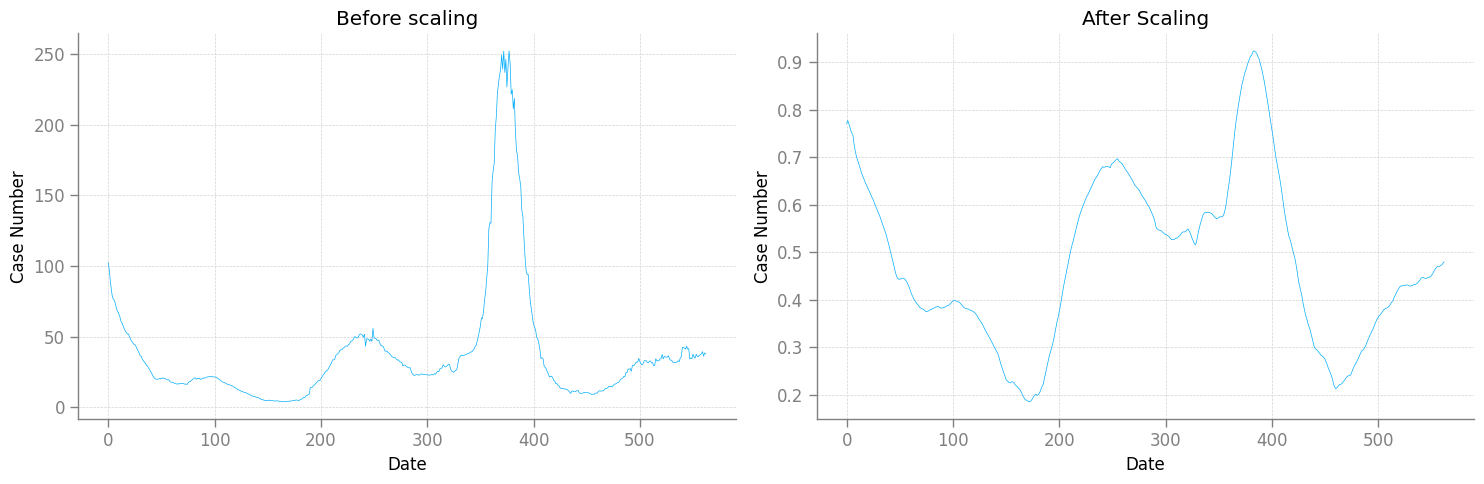

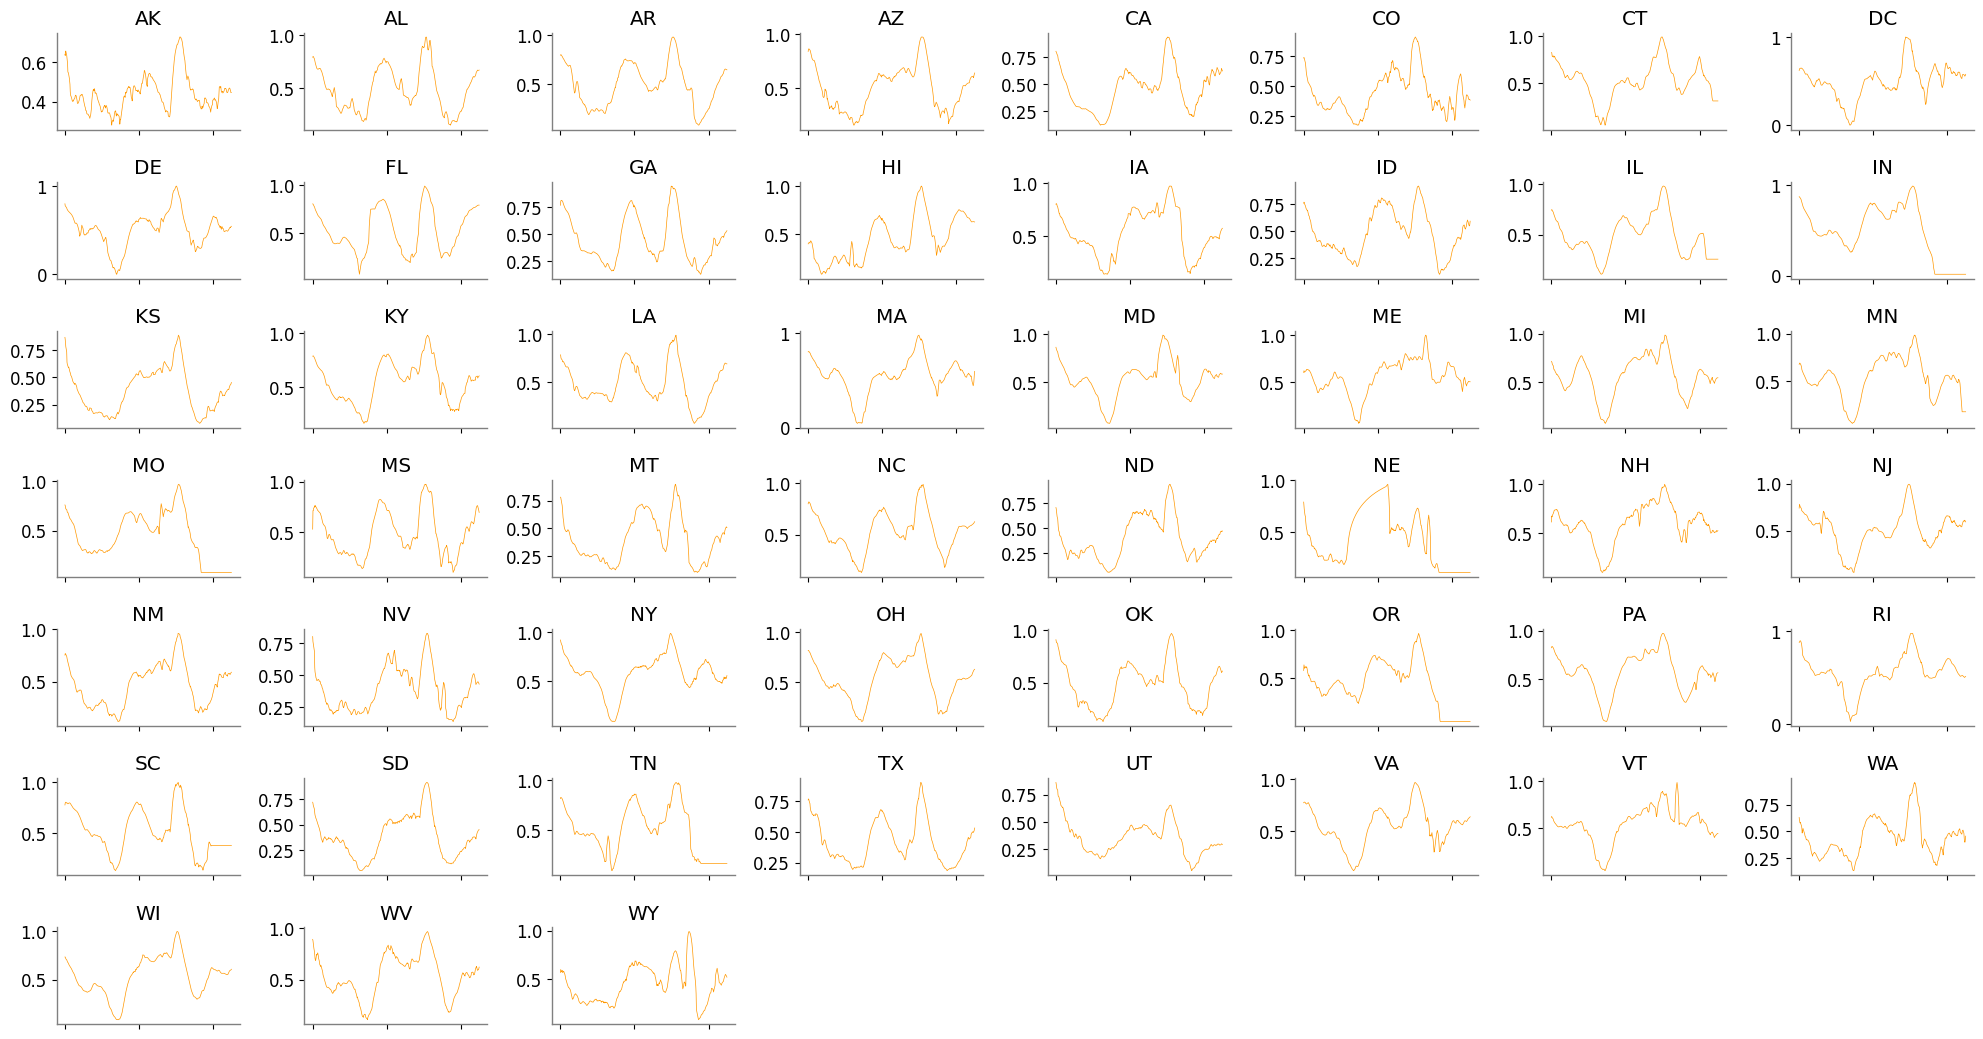

In [42]:
dfinfo = DfInfo(df)
#scaled_df = process_df(df, display_counties=True) # ~10 minute runtime to plot all 3000 counties!
scaled_df = process_df(df, display_counties=False) 

Nans count in the dataframe b4 rollingav: 0
Nans count in the dataframe after rollingav: 0
Nans count in the dataframe: 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_41461/2849232918.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


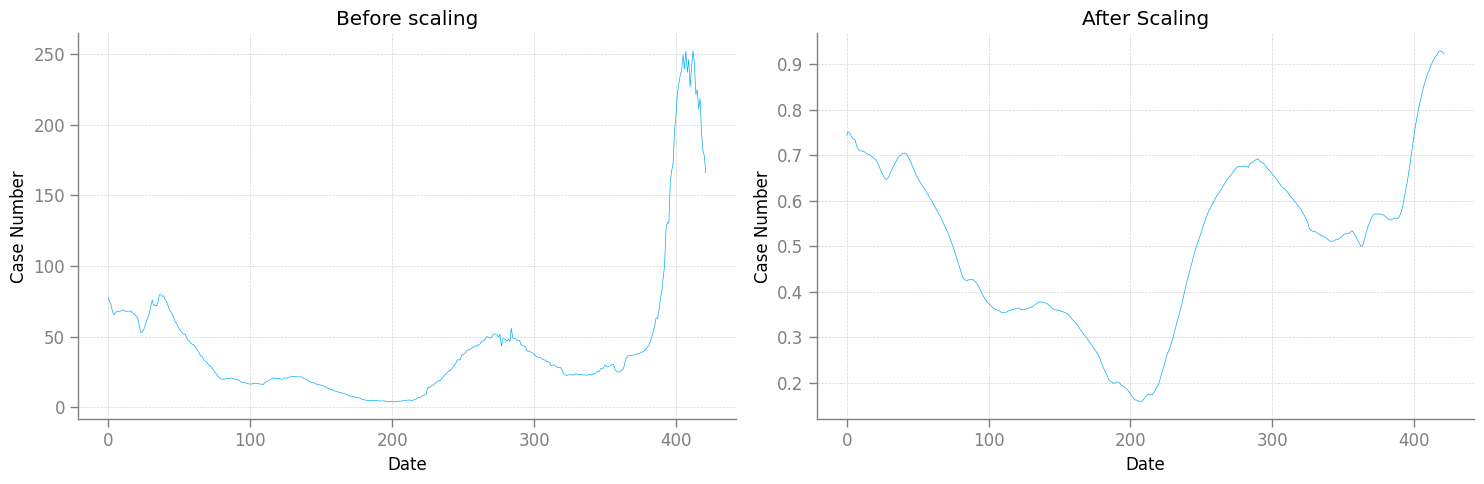

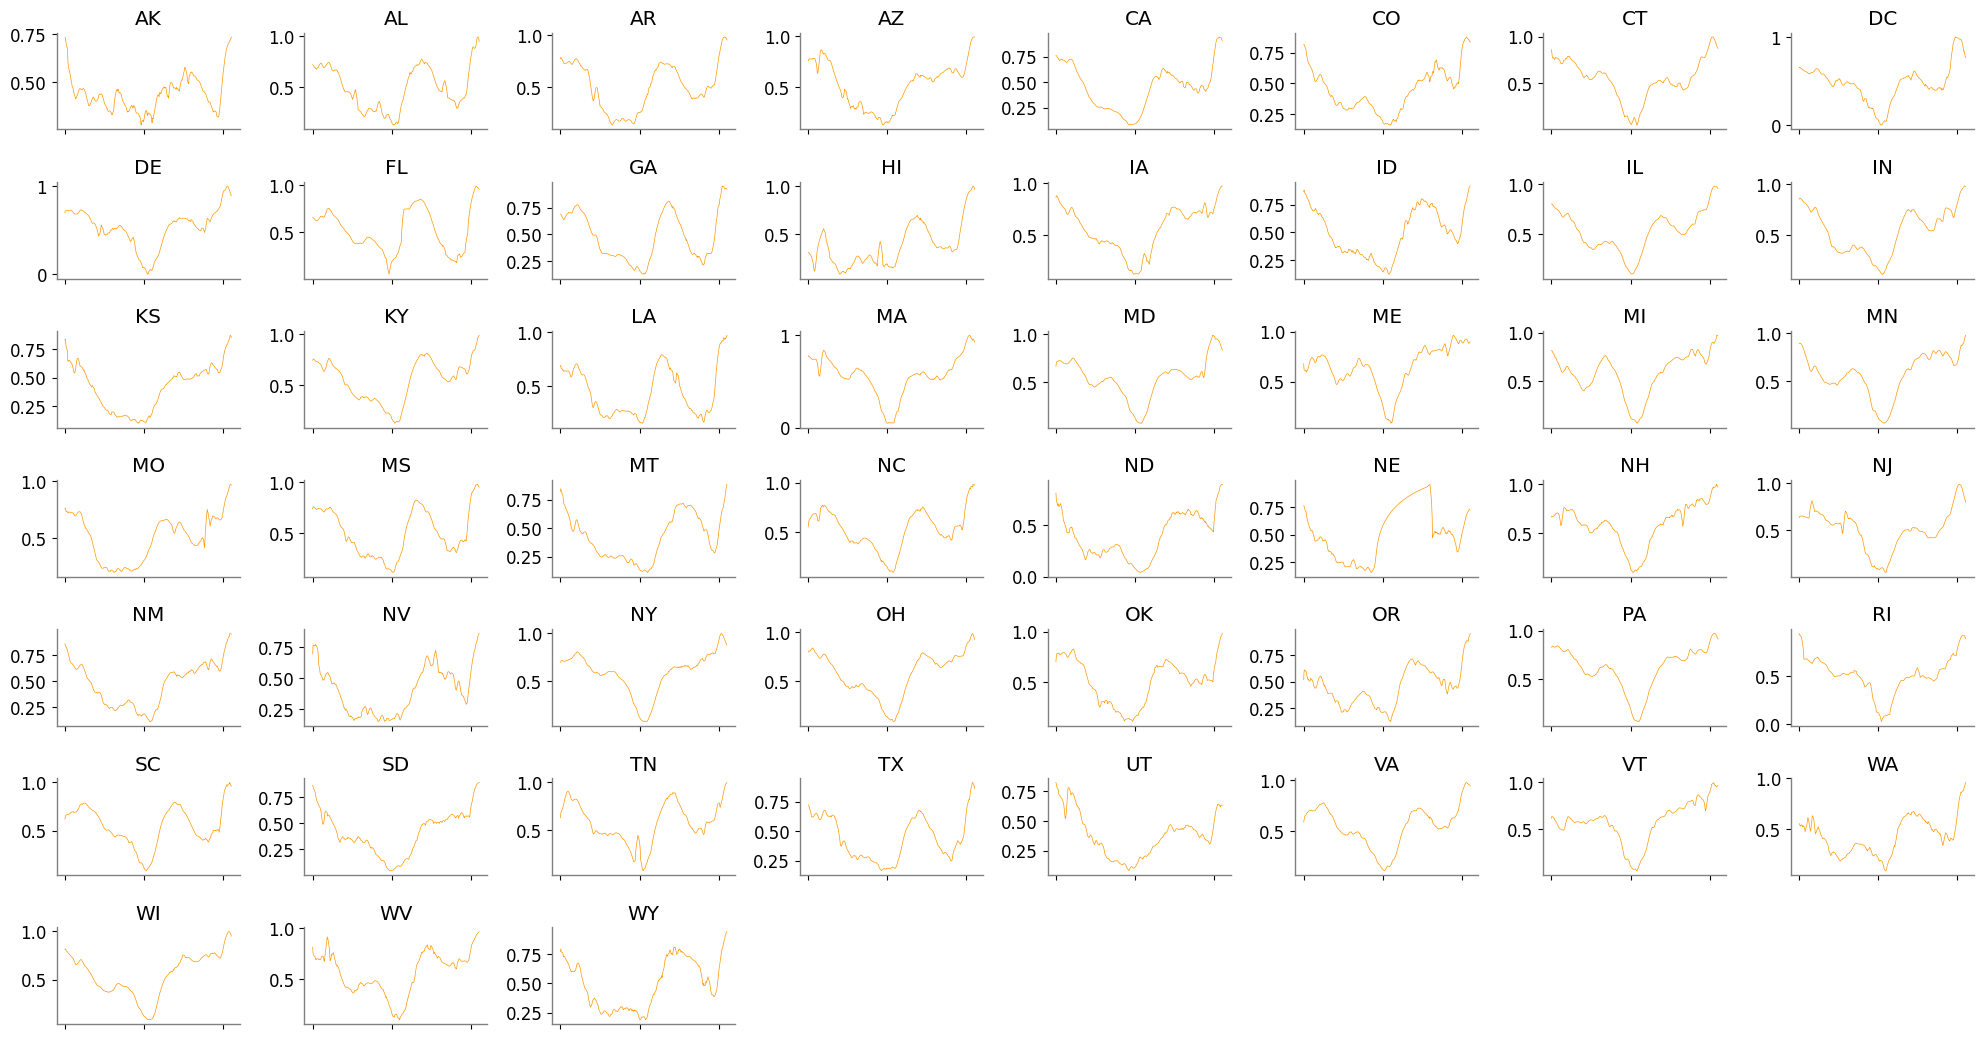

Length before dropping per state: 3142
Length after dropping per state: 3142


In [43]:
dfinfo = DfInfo(dftrain)
dftrain_scaled = process_df(dftrain, train=True)
print(f"Length before dropping per state: {len(dftrain_scaled)}")
dftrain_scaled = dftrain_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dftrain_scaled)}")
dftrain_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TRAIN_SCALED.csv')

Nans count in the dataframe b4 rollingav: 279
Nans count in the dataframe after rollingav: 279
Nans count in the dataframe: 279


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_41461/2849232918.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


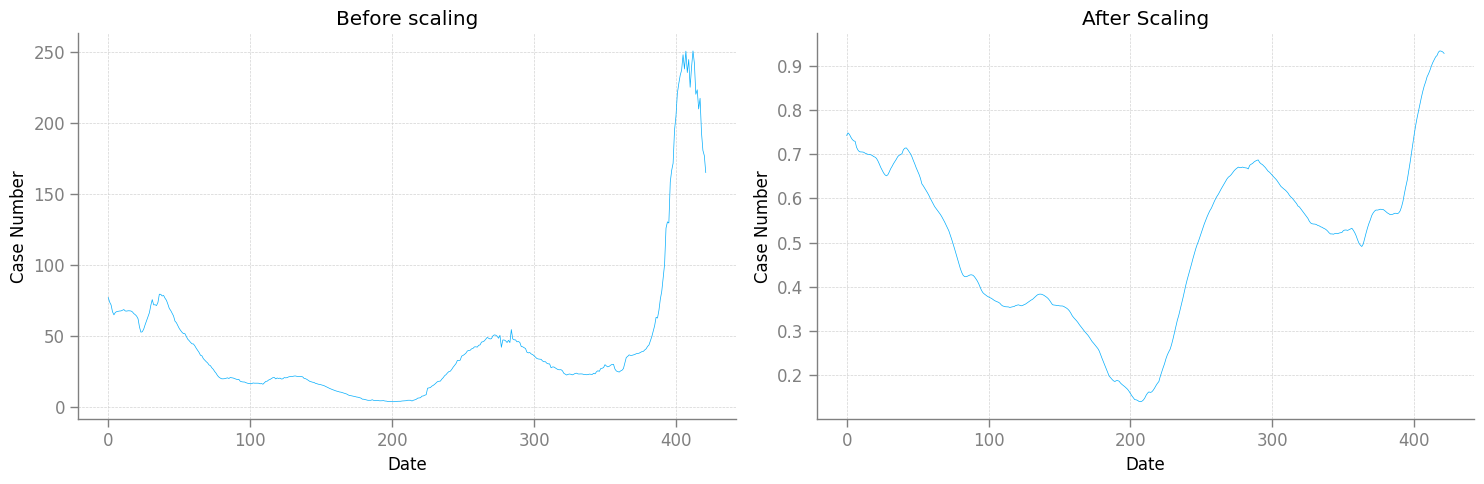

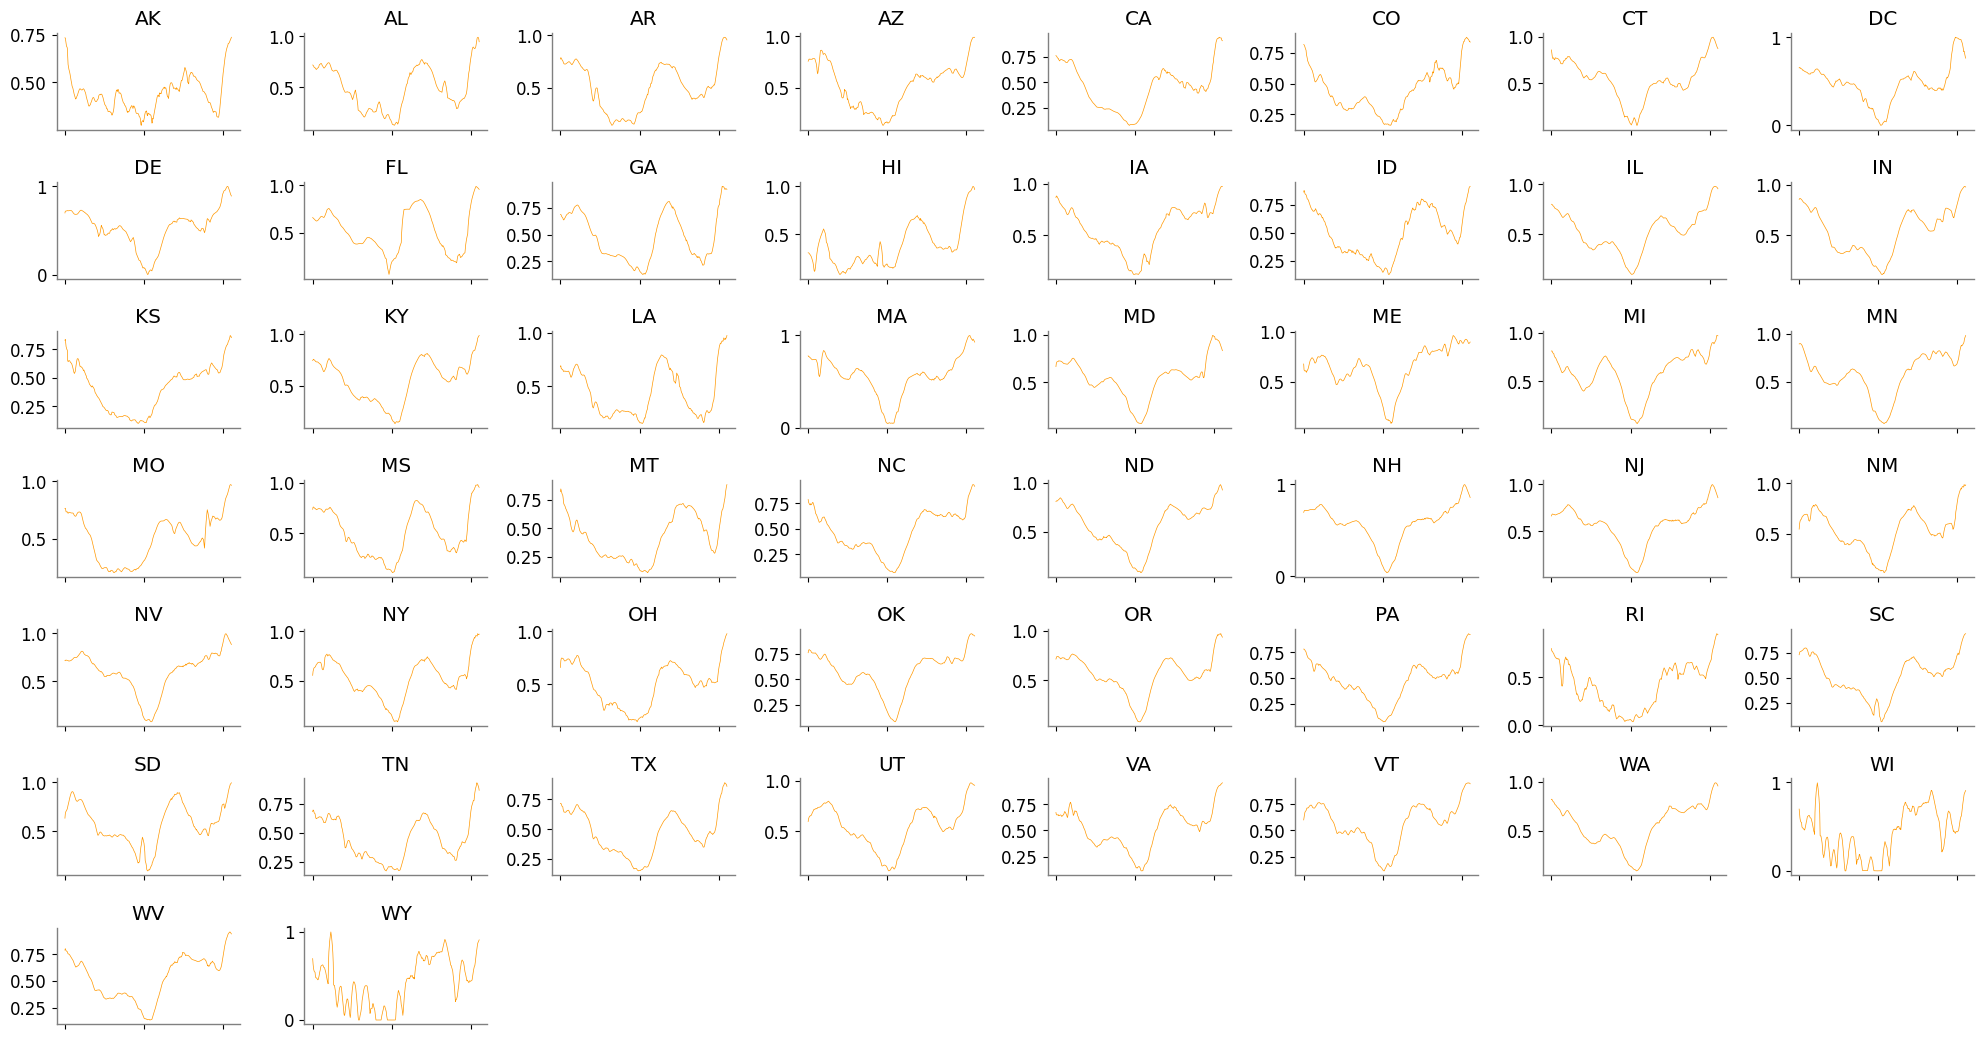

Length before dropping per state: 3142
Length after dropping per state: 3049


In [44]:
# Remove training data for: NE.
dftrain = dftrain[dftrain['State'] != 'NE']
dfinfo = DfInfo(dftrain)
dftrain_scaled = process_df(dftrain, train=True)
print(f"Length before dropping per state: {len(dftrain_scaled)}")
dftrain_scaled = dftrain_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dftrain_scaled)}")
dftrain_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TRAIN_SCALED.csv')

Nans count in the dataframe b4 rollingav: 0
Nans count in the dataframe after rollingav: 0
Nans count in the dataframe: 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_41461/2849232918.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


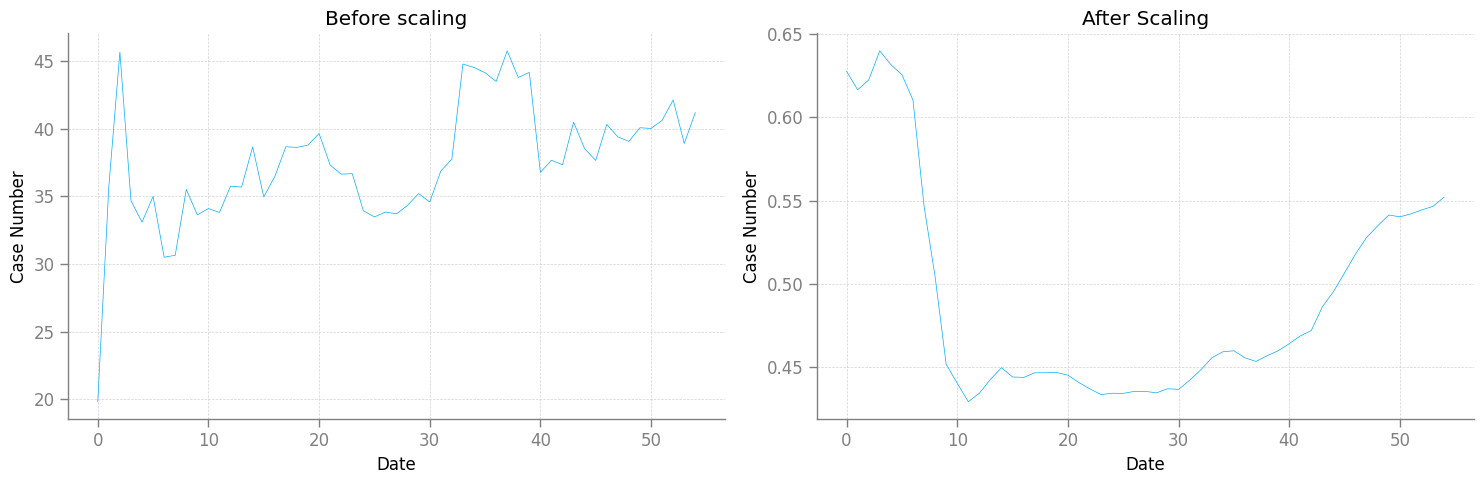

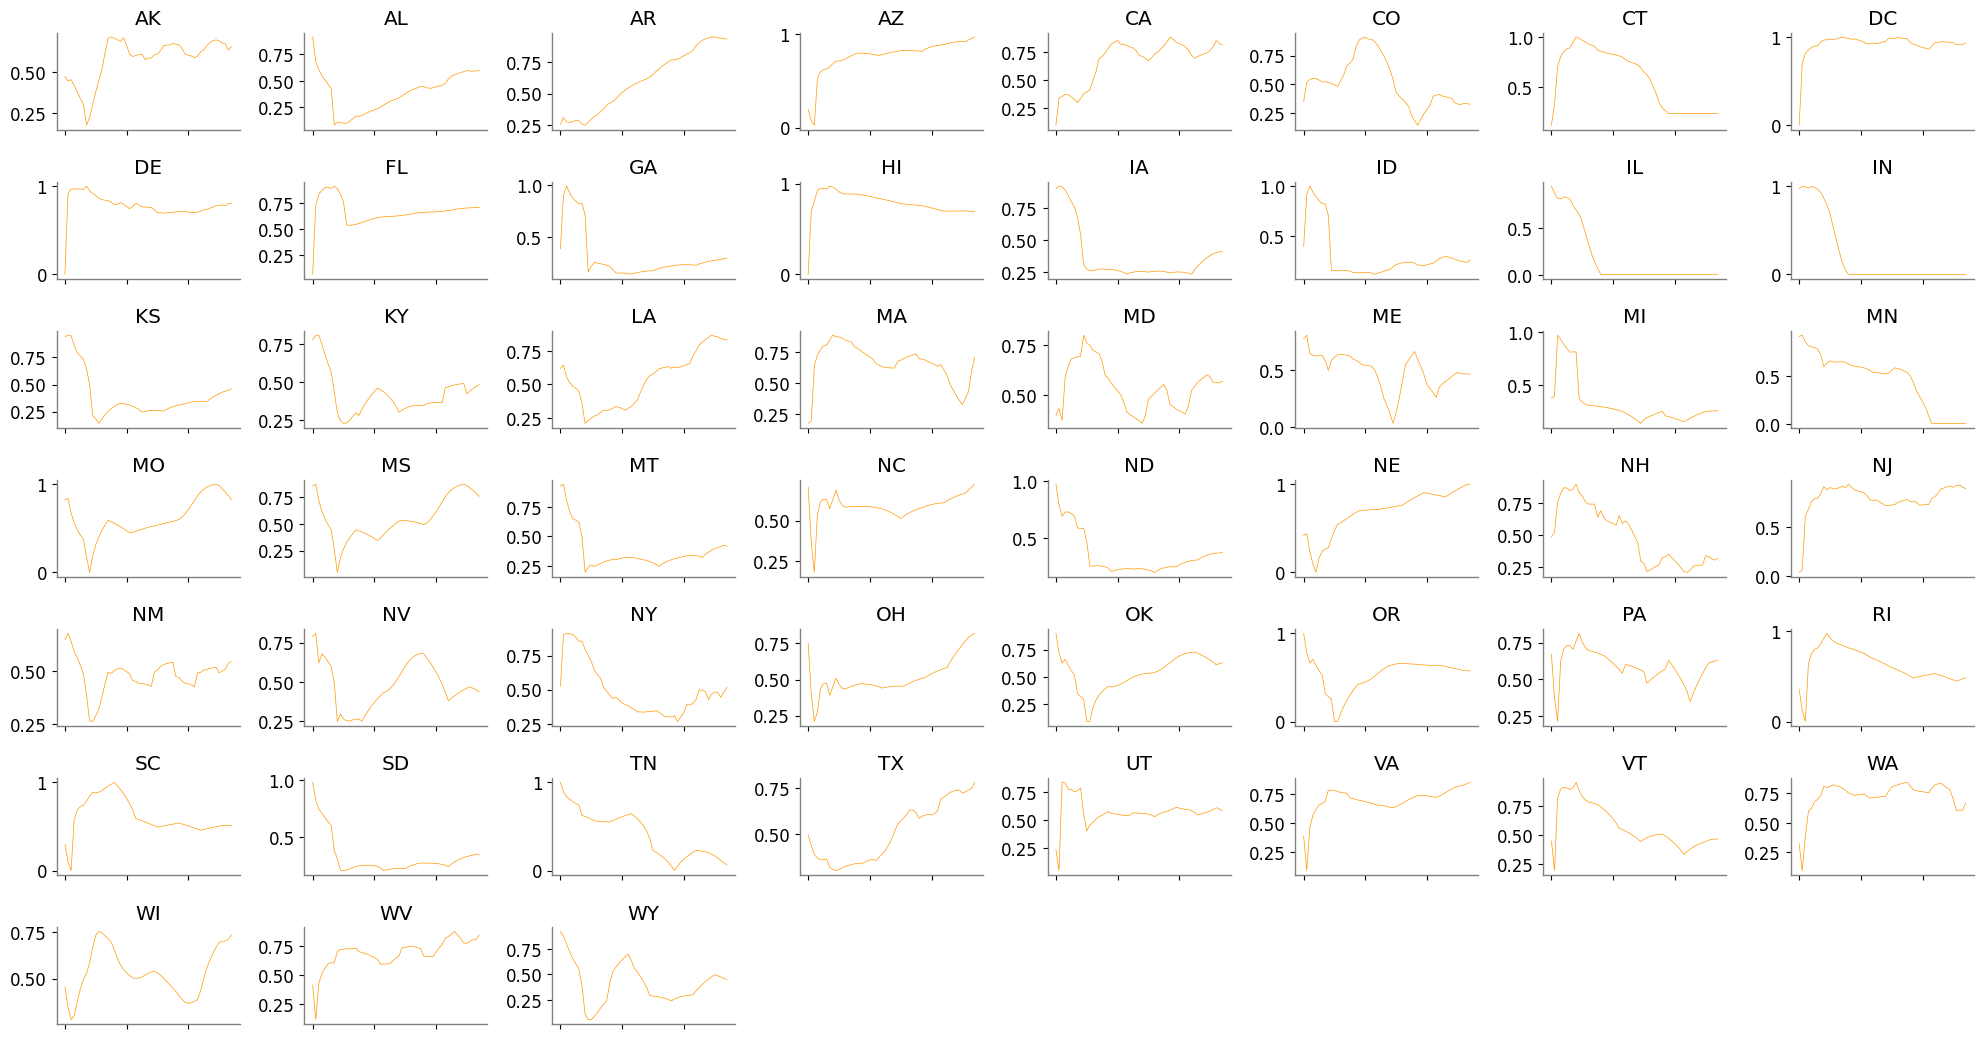

Length before dropping per state: 3142
Length after dropping per state: 3142


In [45]:
dfinfo = DfInfo(dfval)
dfval_scaled = process_df(dfval)
print(f"Length before dropping per state: {len(dfval_scaled)}")
dfval_scaled = dfval_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dfval_scaled)}")
dfval_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/VAL_SCALED.csv')

Nans count in the dataframe b4 rollingav: 1857
Nans count in the dataframe after rollingav: 1857
Nans count in the dataframe: 1857


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_41461/2849232918.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


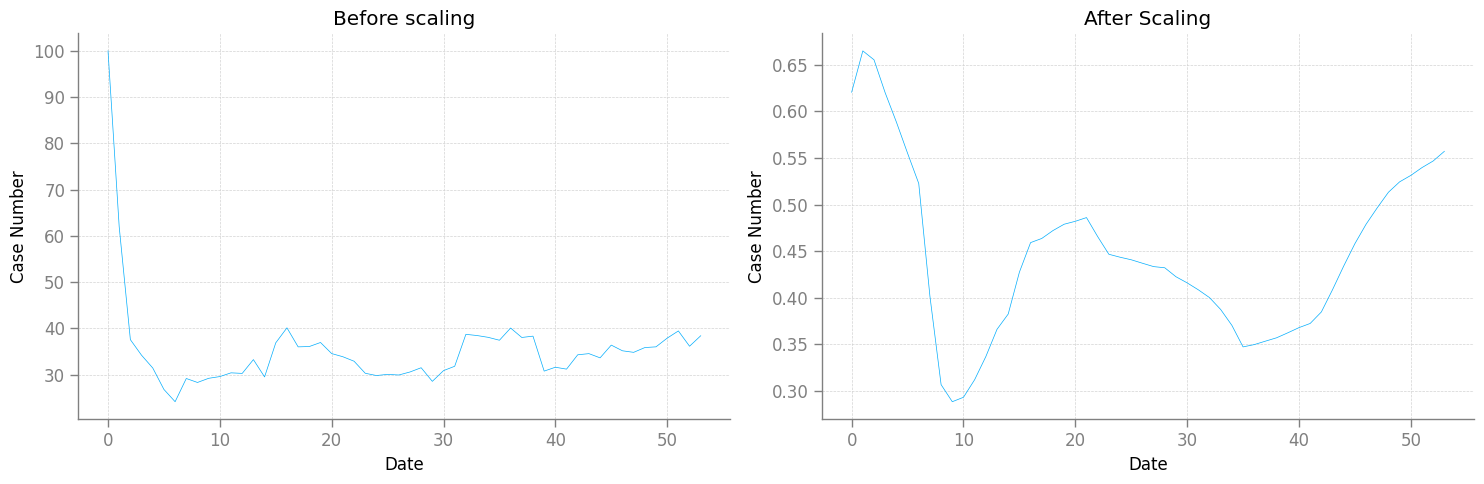

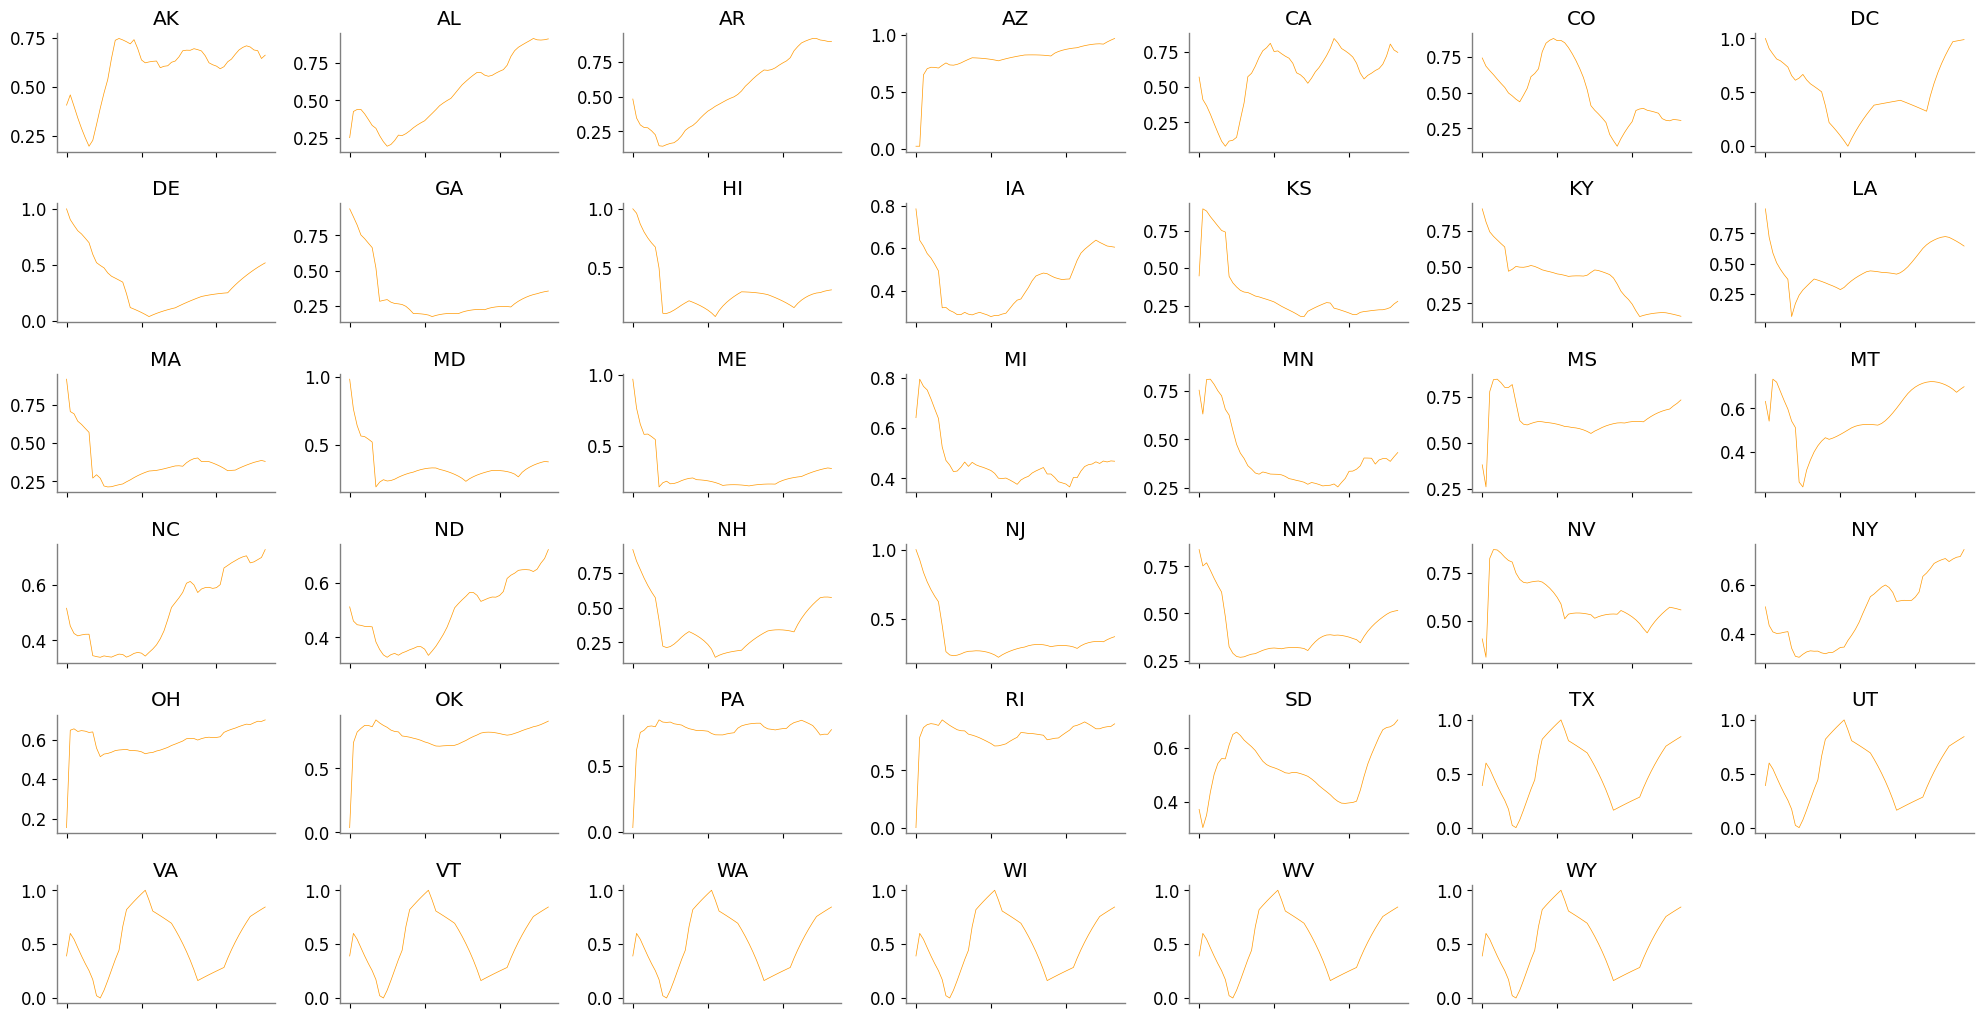

Length before dropping per state: 3063
Length after dropping per state: 2444


In [46]:
# Remove validation for states: CT, FL, IL, IN, MO, NE, OR, SC, TN.
drop = ['CT', 'FL', 'IL', 'ID', 'IN', 'MO', 'NE', 'OR', 'SC', 'TN']
dfval = dfval[~dfval['State'].isin(drop)]
dfval_scaled = process_df(dfval)
print(f"Length before dropping per state: {len(dfval_scaled)}")
dfval_scaled = dfval_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dfval_scaled)}")
dfval_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/VAL_SCALED.csv')

Nans count in the dataframe b4 rollingav: 0
Nans count in the dataframe after rollingav: 0
Nans count in the dataframe: 0


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_41461/2849232918.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


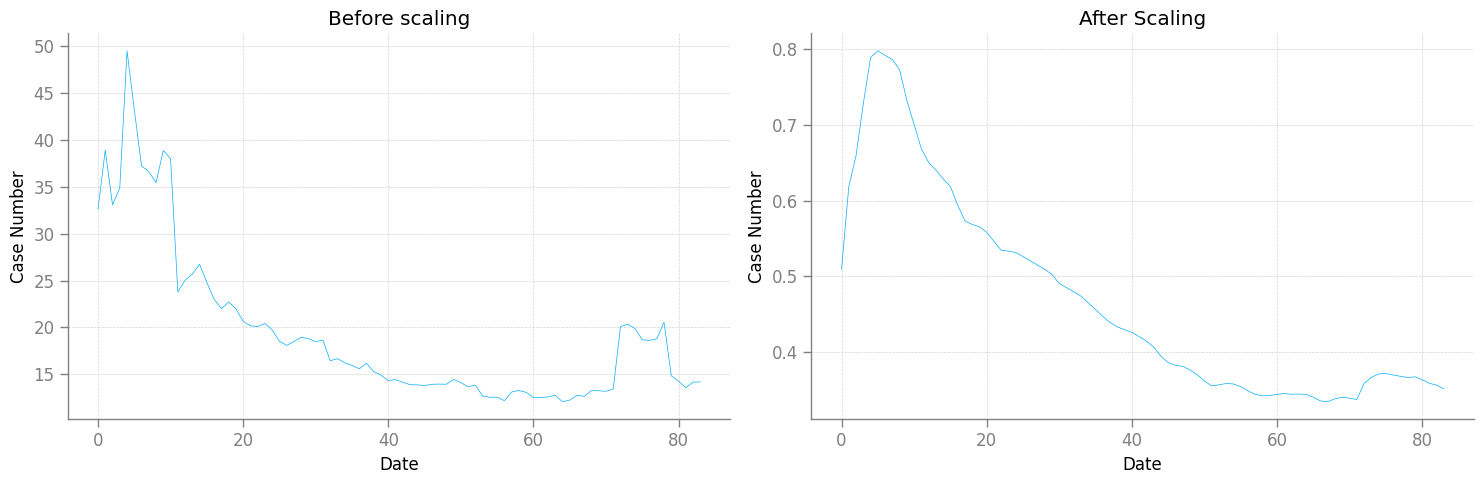

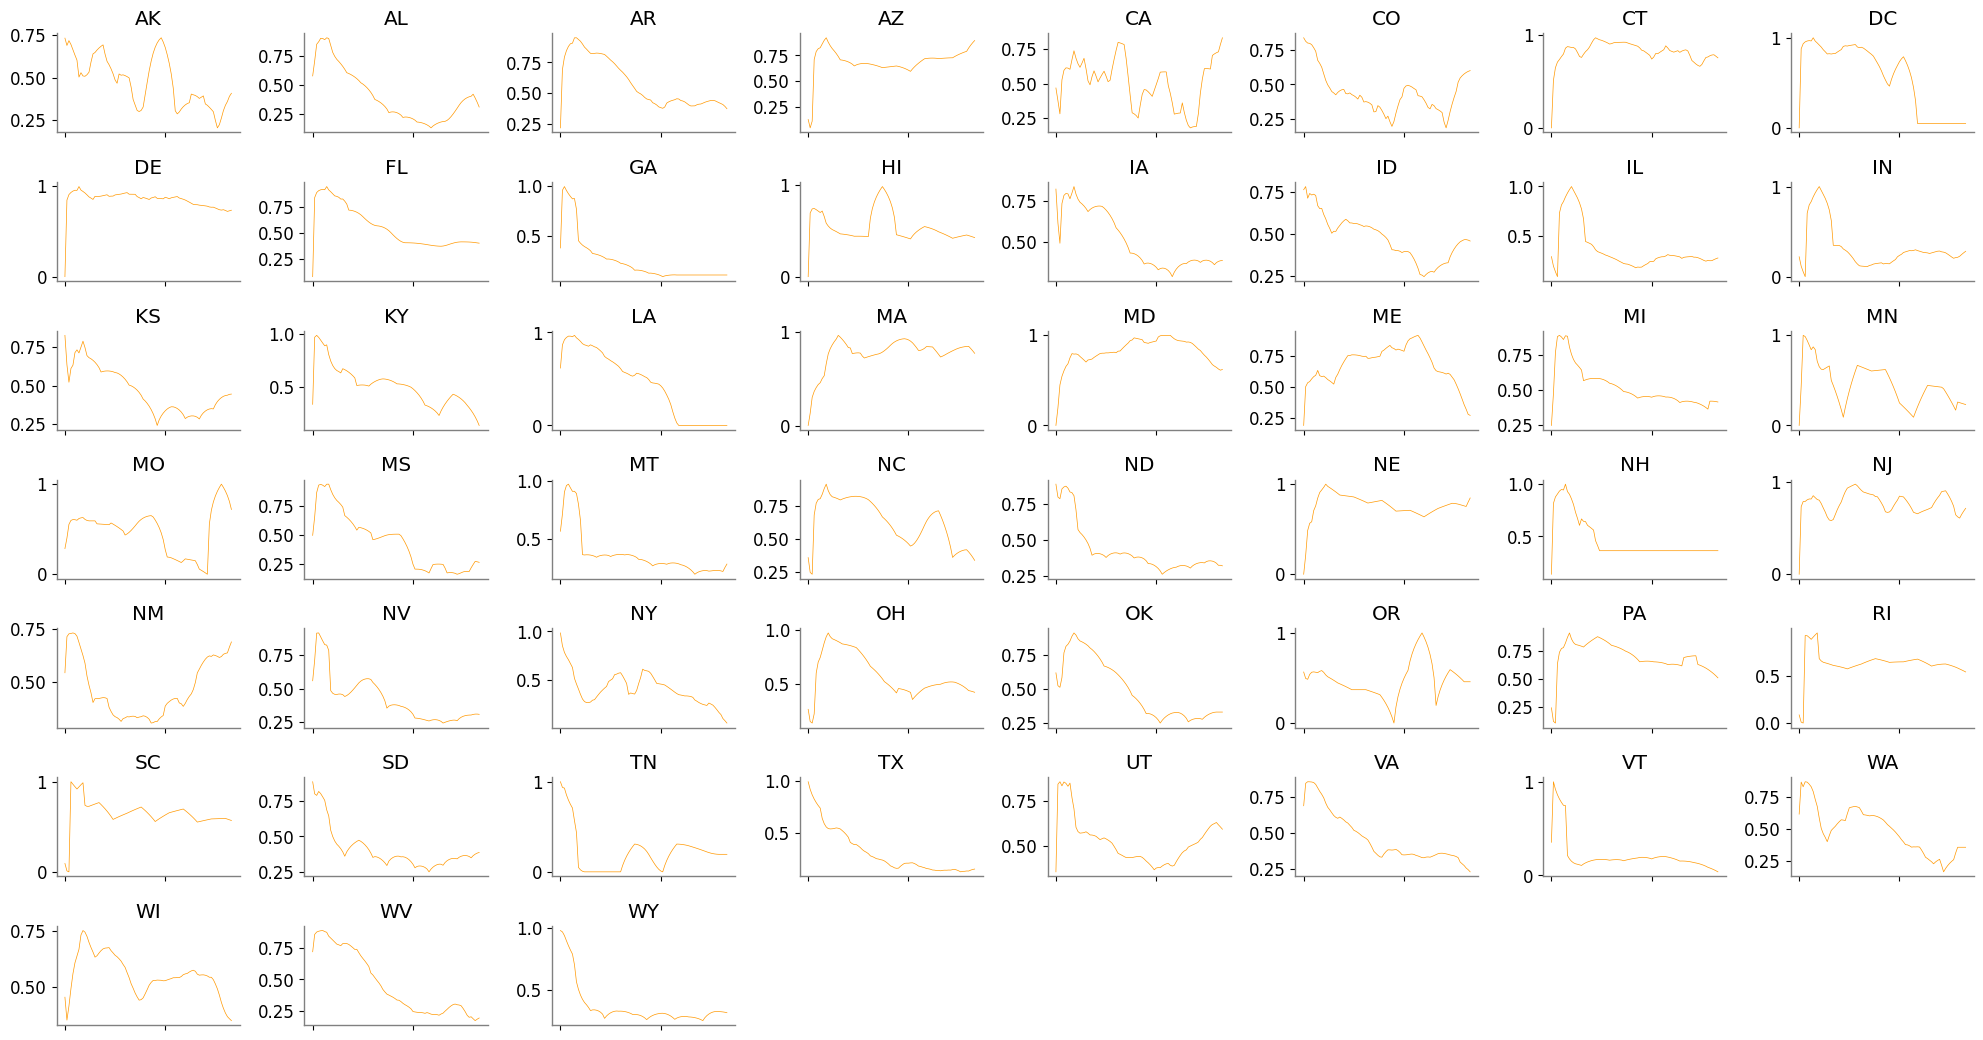

Length before dropping per state: 3142
Length after dropping per state: 3142


In [47]:
dfinfo = DfInfo(dftest)
dftest_scaled = process_df(dftest)
print(f"Length before dropping per state: {len(dftest_scaled)}")
dftest_scaled = dftest_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dftest_scaled)}")
dftest_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TEST_SCALED.csv')

Nans count in the dataframe b4 rollingav: 2421
Nans count in the dataframe after rollingav: 2421
Nans count in the dataframe: 2421


/var/folders/j9/bcpct8w966j66c8j5tg5wd4c0000gn/T/ipykernel_41461/2849232918.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


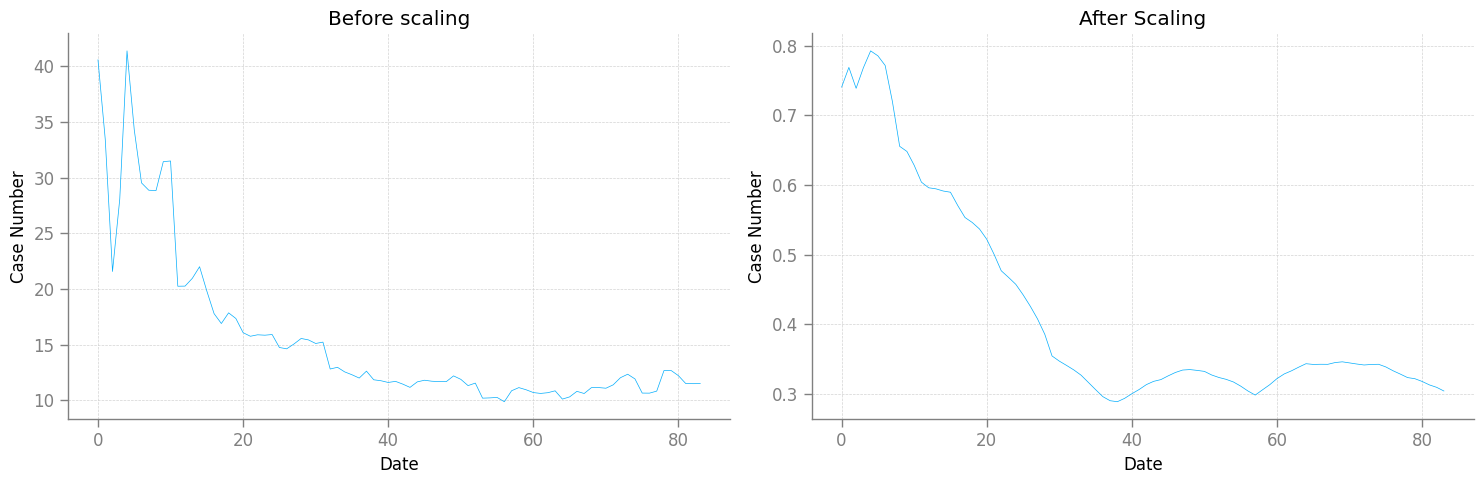

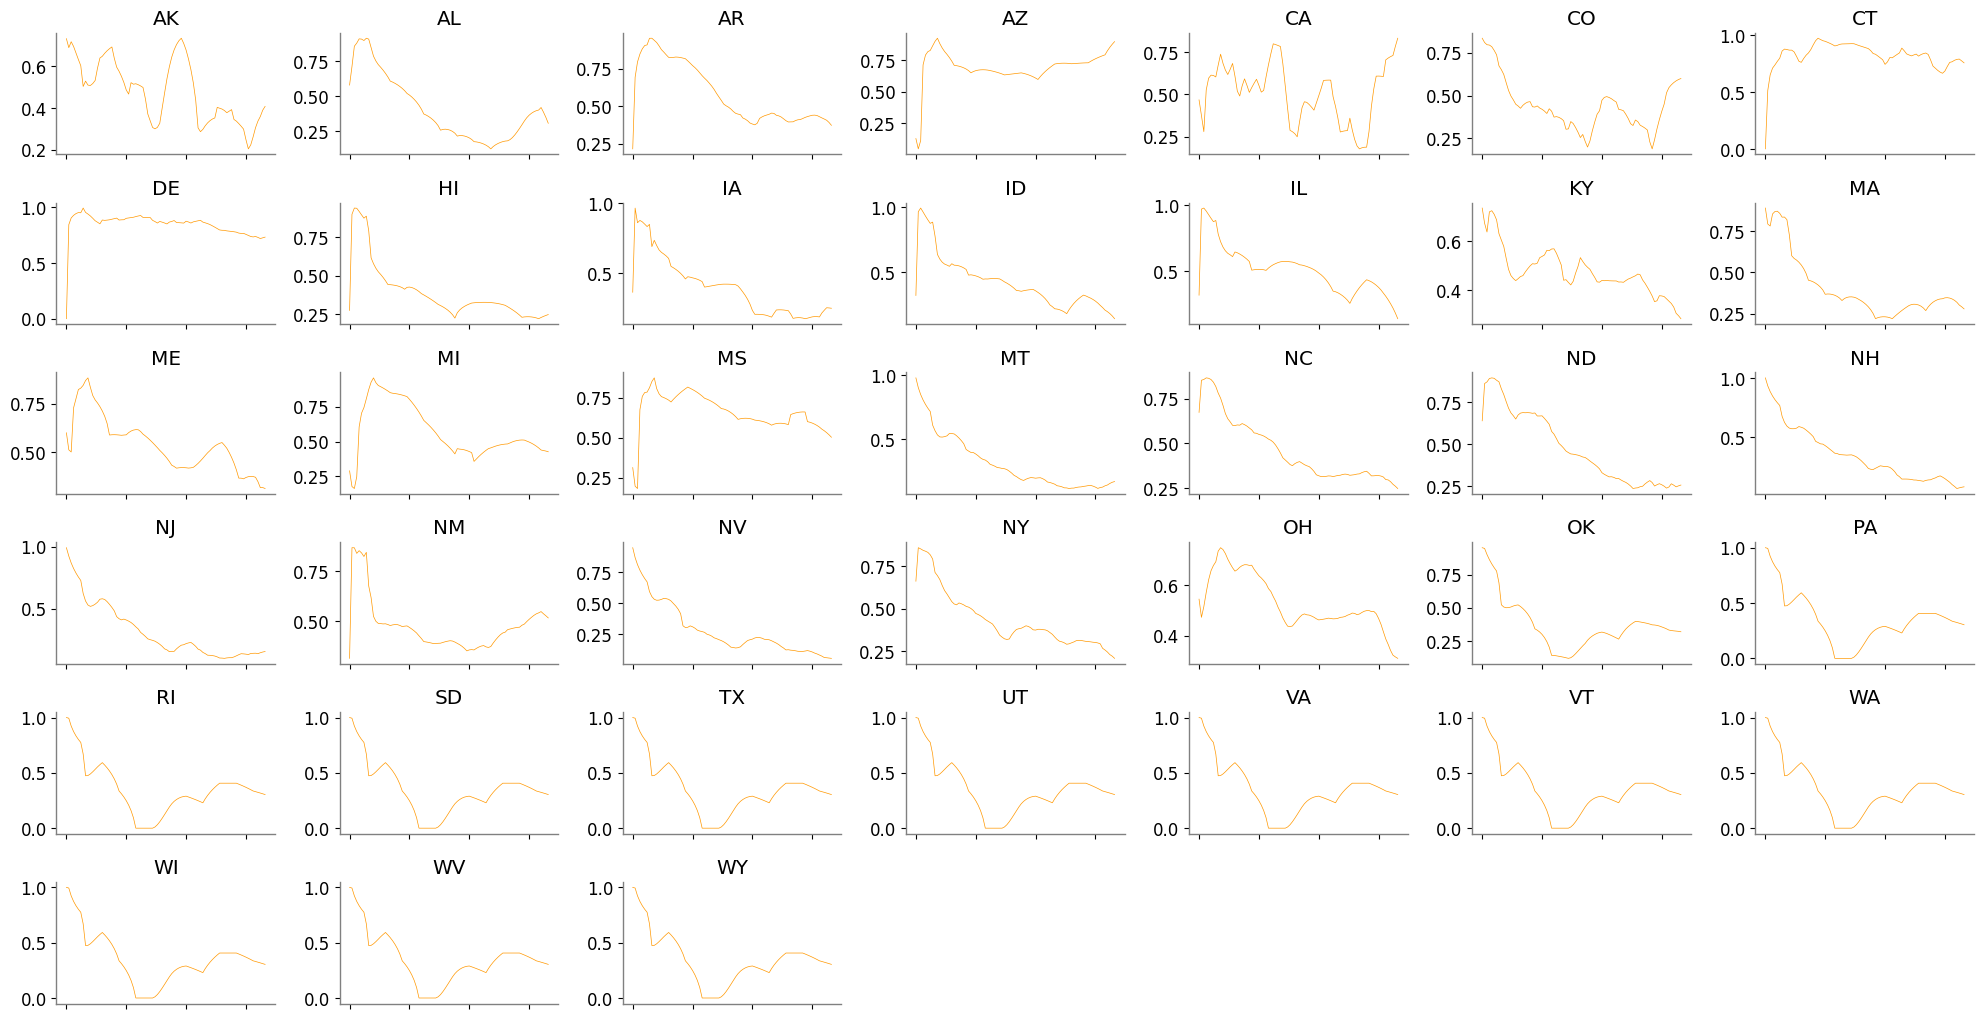

Length before dropping per state: 2965
Length after dropping per state: 2158


In [48]:
# Remove test data for: DC, FL, GA, IN, LA, MD, MN, MO, NE, KS, OR, SC, TN.
drop = ['DC', 'FL', 'GA', 'IN', 'LA', 'MD', 'MN', 'MO', 'NE', 'KS', 'OR', 'SC', 'TN']
dftest = dftest[~dftest['State'].isin(drop)]
dfinfo = DfInfo(dftest)
dftest_scaled = process_df(dftest)
print(f"Length before dropping per state: {len(dftest_scaled)}")
dftest_scaled = dftest_scaled.dropna(axis=0)
print(f"Length after dropping per state: {len(dftest_scaled)}")
dftest_scaled.to_csv('/Users/jakecordery/Desktop/dissertation-york/data/processed/TEST_SCALED.csv')